1_0.csv


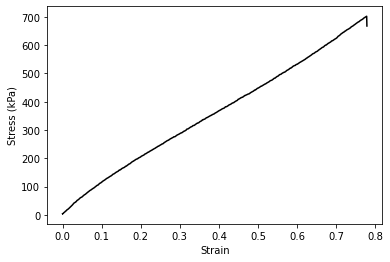

854.6068633287998
1
1_1.csv


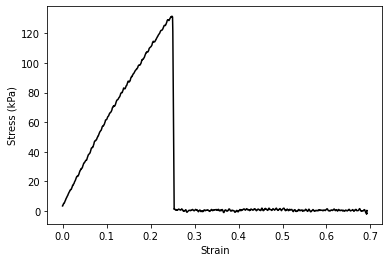

521.4176651524715
1
1_12_in_grip.csv


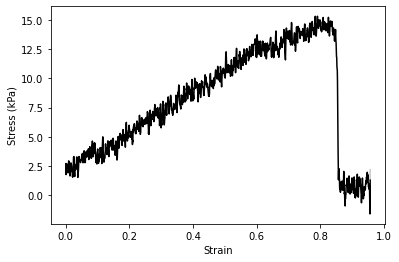

16.34751419871102
1
1_12_with_tape.csv


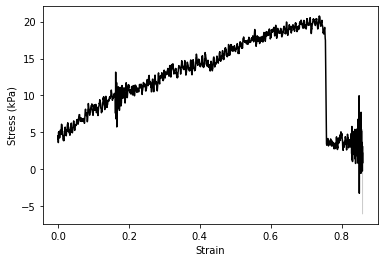

20.48037548701184
1
1_15.csv


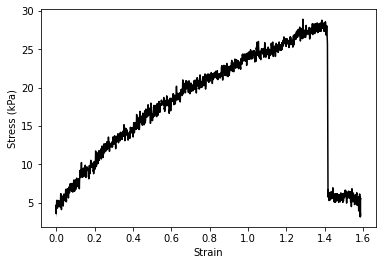

16.617051567143154
1
1_19.CSV


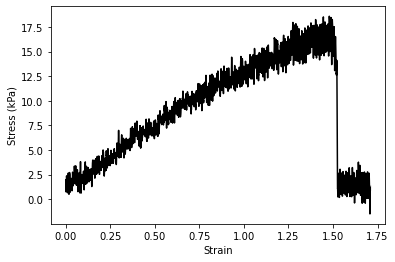

10.764410724718491
1
1_3.csv


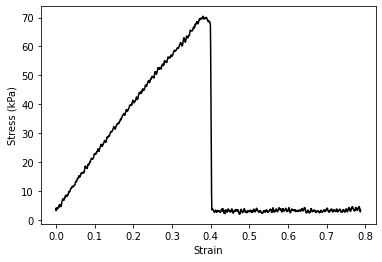

176.62207659884453
1
1_7.csv


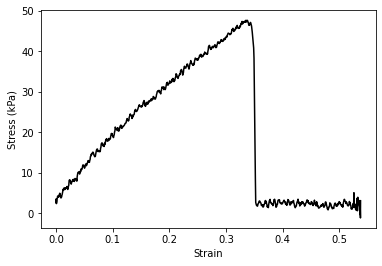

130.24137649683075
1
1_7_a.csv


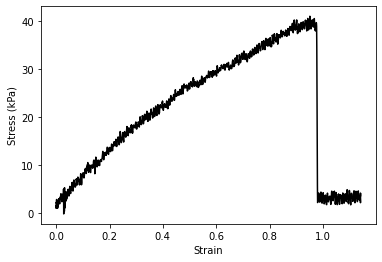

39.1440916639066
1
1_9.csv


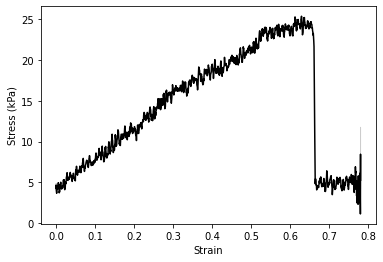

33.454606166335076
1
25_122_a.csv


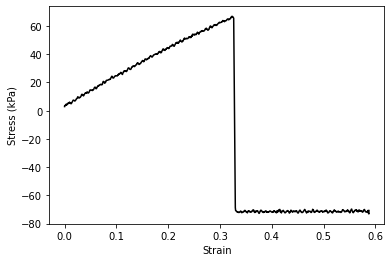

195.24567001473497
25
25_122_b.csv


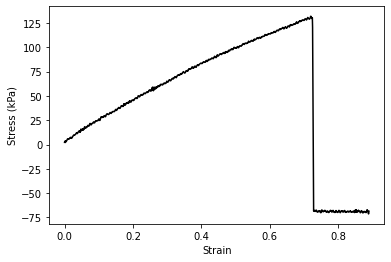

177.21145176915954
25
25_122_c.csv


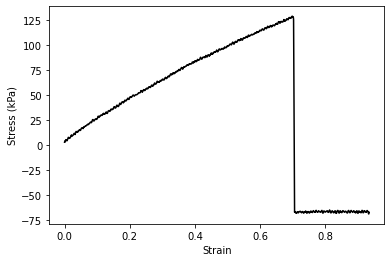

176.09956559406763
25
3_2.csv


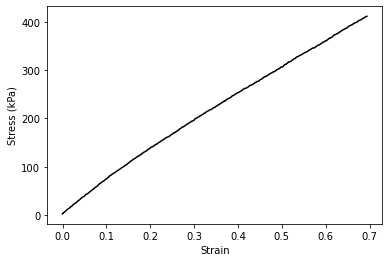

578.5515453243759
3
5_1.csv


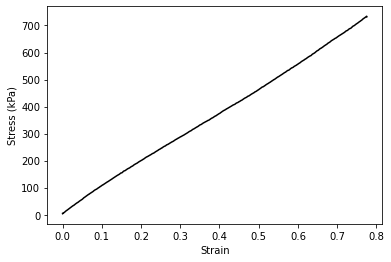

914.9376733679441
5
5_28.CSV


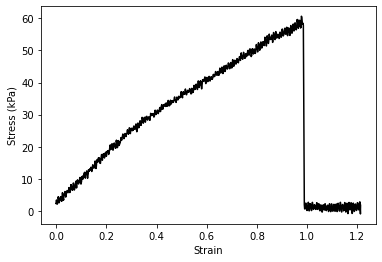

56.33263116773017
5
7_3.csv


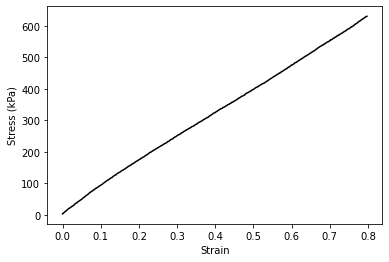

767.4852825890134
7
9_1.csv


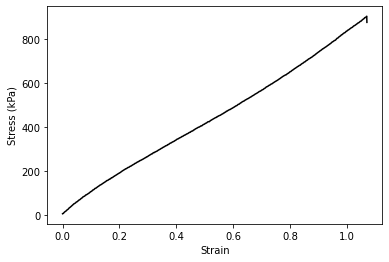

801.7871741968095
9
       E (kPA)  ratio 527 (%)          labels  Maximum Strain
0   854.606863       0.000000             1_0        0.777389
1   521.417665      50.000000             1_1        0.248195
2    16.347514      92.307692    1_12_in_grip        0.790348
3    20.480375      92.307692  1_12_with_tape        0.737085
4    16.617052      93.750000            1_15        1.285441
5    10.764411      95.000000            1_19        1.478696
6   176.622077      75.000000             1_3        0.379226
7   130.241376      87.500000             1_7        0.334615
8    39.144092      87.500000           1_7_a        0.950537
9    33.454606      90.000000             1_9        0.628696
10  195.245670      82.993197        25_122_a        0.322880
11  177.211452      82.993197        25_122_b        0.718978
12  176.099566      82.993197        25_122_c        0.698278
13  578.551545      40.000000             3_2        0.693325
14  914.937673      16.666667             5_1     

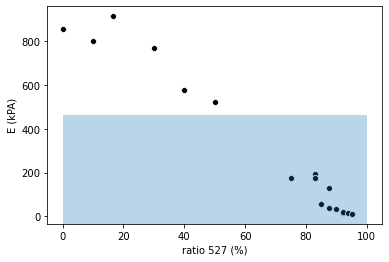

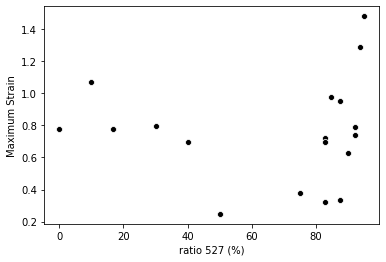

<Figure size 432x288 with 0 Axes>

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import csv
E_data = pd.DataFrame()
E_list = []
labels = []
ratios = []
strain_fail = []
def plotgraph(filename, name):
    f = open(filename, 'r')
    csv_f = list(csv.reader(f))
    area = float(csv_f[0][1]) * float(csv_f[1][1])
    length = float(csv_f[2][1]) * 0.001 #Conversion to m
    f.close()
    data = pd.read_csv(filename, skiprows=5, names=['mm','N'])
    data.reset_index(drop=True, inplace=True)
    data['Stress (kPa)'] = (data['N'] / (area * 0.001 * 0.001)) / 1000 #bc it's *conv to m twice and converted to kPA
    data['Strain'] = data['mm'] * 0.001 / length #conversion from mm to m
    a = data[data['N'] == max(data['N'])]['mm']
    E_data = data[data['mm'] < float(a)]
    strain_fail.append(E_data['Strain'].iloc[-1])
    E, offset = np.polyfit(E_data['Strain'], E_data['Stress (kPa)'], deg = 1)
    plt.clf()
    ax = sns.lineplot(data=data, x='Strain', y='Stress (kPa)', color='black') # Work more on making the graphs pretty
    plt.show()
    print(E)
    name = name.split('.')[0]
    E_list.append(E)
    labels.append(name.split(" ")[0])
    ratio = name.split(" ")[0]
    print(ratio.split("_")[0])
    fratio = float(ratio.split("_")[1]) / (float(ratio.split("_")[0]) + float(ratio.split("_")[1])) * 100
    ratios.append(fratio)
    plt.clf()

path = r'C:\Users\ichim\Downloads\Processing Lab\csvs_go_here'
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
for file in onlyfiles:
    print(file)
    plotgraph(join(path, file), file)
E_data['E (kPA)'] = E_list
E_data['ratio 527 (%)'] = ratios
E_data['labels'] = labels
E_data['Maximum Strain'] = strain_fail
print(E_data)
axs = sns.scatterplot(data=E_data, x='ratio 527 (%)', y='E (kPA)', color='black')
axs.axvspan(xmin=0, xmax=100, ymax=0.5, alpha=0.1, facecolor='grey')
plt.show()
plt.clf()
axs = sns.scatterplot(data=E_data, x='ratio 527 (%)', y='Maximum Strain', color='black')
plt.show()
plt.clf()
E_data.to_clipboard()

1_0.csv


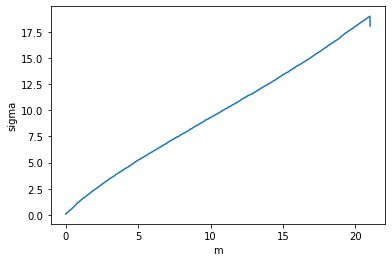

1_1.csv


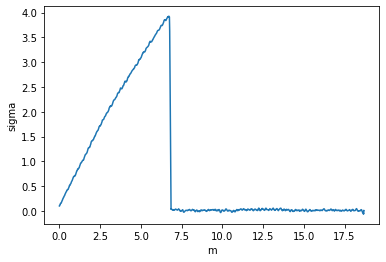

1_12_in_grip.csv


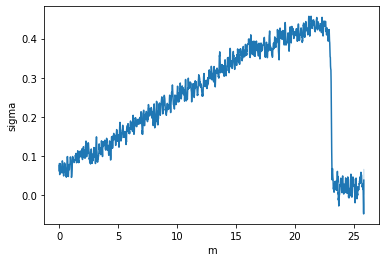

1_12_with_tape.csv


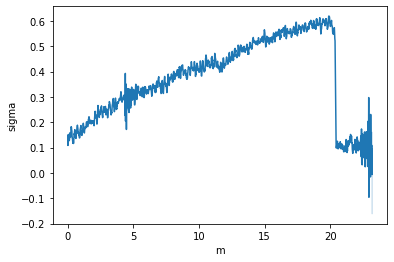

1_15.csv


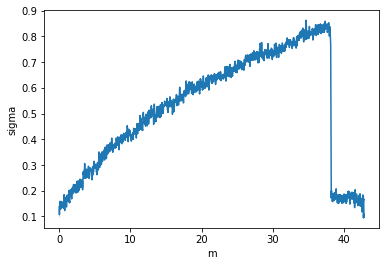

1_19.CSV


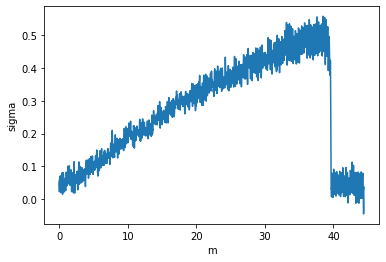

1_3.csv


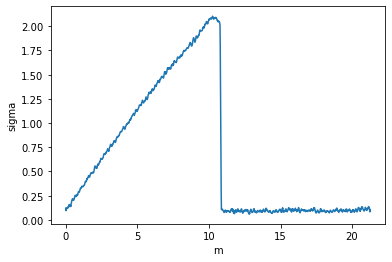

1_7.csv


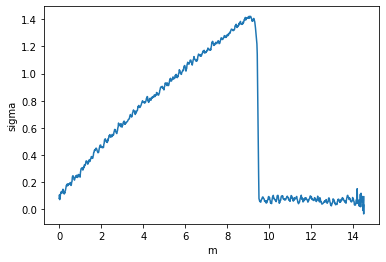

1_9.csv


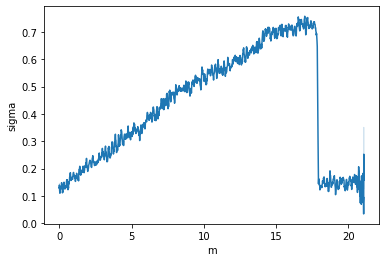

3_2.csv


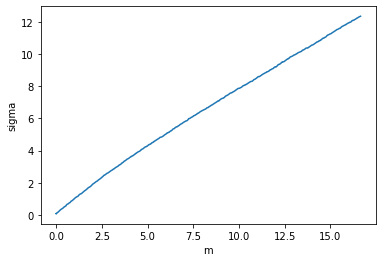

5_1.csv


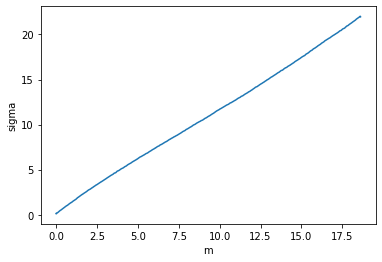

5_28.CSV


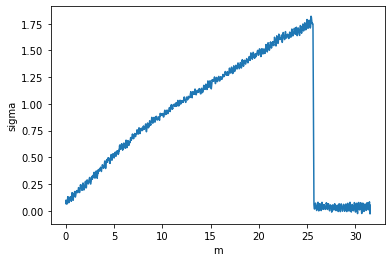

7_3.csv


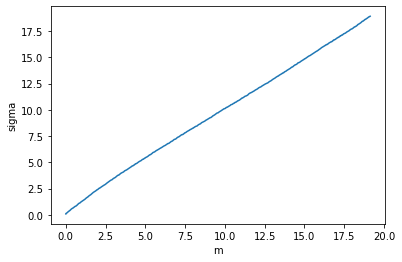

9_1.csv


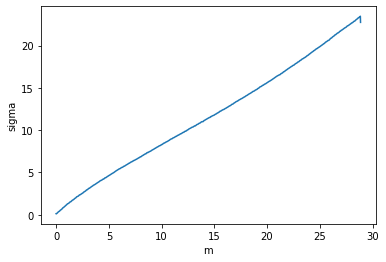

<Figure size 432x288 with 0 Axes>

In [1]:
#plotting any graph
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import csv
def plotgraph(filename):
    data = pd.read_csv(filename, skiprows=5, names=['m','sigma']) #Skiprows skips the N rows of the file, typically headers. Name your columns here
    data.reset_index(drop=True, inplace=True)
    sns.lineplot(data=data, x='m', y='sigma') # Work more on making the graphs pretty
    plt.show()
    plt.clf()

path = r'C:\Users\ichim\Downloads\Processing Lab\csvs_go_here' #Get the aboslute path of a folder where you have your csvs (and only those pls) and paste it here
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
for file in onlyfiles:
    print(file)
    plotgraph(join(path, file))

1A 1_1.csv
    ω (rad/s)  Shear Modulus (Pa)     
0    0.628319           2988980.0   G'
1    0.995816           3260300.0   G'
2    1.578270           3515120.0   G'
3    2.501390           3524410.0   G'
4    3.964410           3287980.0   G'
5    6.283190           3238280.0   G'
6    9.958090           3214840.0   G'
7   15.782800           3293990.0   G'
8   25.013700           2843110.0   G'
9   39.643800           2325420.0   G'
10  62.831900           1356090.0   G'
11   0.628319             63333.1  G''
12   0.995816             88454.9  G''
13   1.578270            127897.0  G''
14   2.501390            106150.0  G''
15   3.964410            151550.0  G''
16   6.283190            165329.0  G''
17   9.958090            159584.0  G''
18  15.782800            189088.0  G''
19  25.013700            288087.0  G''
20  39.643800            155379.0  G''
21  62.831900            248381.0  G''


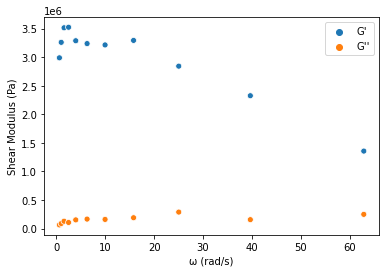

1A 1_15.csv
    ω (rad/s)  Shear Modulus (Pa)     
0    0.628319            282451.0   G'
1    0.995816            539434.0   G'
2    1.578270            354445.0   G'
3    2.501390            284024.0   G'
4    3.964410            241602.0   G'
5    6.283190            206910.0   G'
6    9.958090            133510.0   G'
7   15.782800            -54992.8   G'
8   25.013700           -304524.0   G'
9   39.643800           -738156.0   G'
10   0.628319             58652.1  G''
11   0.995816            136664.0  G''
12   1.578270            132280.0  G''
13   2.501390            182496.0  G''
14   3.964410            210326.0  G''
15   6.283190            259368.0  G''
16   9.958090            297094.0  G''
17  15.782800             71662.9  G''
18  25.013700             43254.6  G''
19  39.643800            143479.0  G''


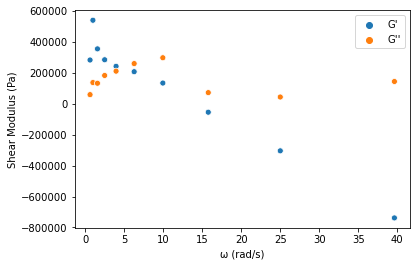

1A 1_7.csv
    ω (rad/s)  Shear Modulus (Pa)     
0    0.628319            525693.0   G'
1    0.995816            409520.0   G'
2    1.578270            397807.0   G'
3    2.501390            346449.0   G'
4    3.964410            231227.0   G'
5    6.283190            101864.0   G'
6    9.958090             32938.8   G'
7   15.782800             55511.5   G'
8   25.013700            -57195.7   G'
9   39.643800           -863422.0   G'
10  62.831900          -1584260.0   G'
11   0.628319             48258.1  G''
12   0.995816             63212.4  G''
13   1.578270             73071.6  G''
14   2.501390             96119.2  G''
15   3.964410            126977.0  G''
16   6.283190            101270.0  G''
17   9.958090            106540.0  G''
18  15.782800            136445.0  G''
19  25.013700            219010.0  G''
20  39.643800             88420.8  G''
21  62.831900            248739.0  G''


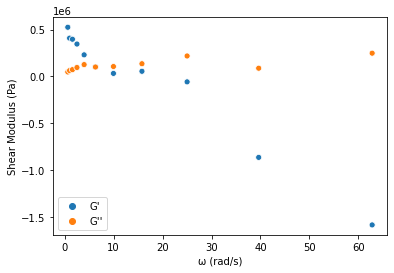

<Figure size 432x288 with 0 Axes>

In [7]:
#Plotting spinnything
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import csv
gdash = 'G' + "'" + " (Pa)"
gdashdash = 'G' + '"' + " (Pa)"
def plotgraph(filename):
    data = pd.read_csv(filename, skiprows=1, names=['ω (rad/s)', 'Shear Modulus (Pa)', '']) #Skiprows skips the N rows of the file, typically headers. Name your columns here
    print(data)
    ax = sns.scatterplot(data=data, x='ω (rad/s)', y='Shear Modulus (Pa)', hue='') # Work more on making the graphs pretty
    plt.show()
    plt.clf()

path = r'C:\Users\ichim\Downloads\Processing Lab\Rheometry' #Get the aboslute path of a folder where you have your csvs (and only those pls) and paste it here
onlyfiles = [f for f in listdir(path) if isfile(join(path, f))]
for file in onlyfiles:
    print(file)
    plotgraph(join(path, file))
